In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
df = pd.read_excel("FPS_hw_x_df_x_taxi.xlsx")
df.head()


,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
data = {
    'offer_class_group':['Comfort','Economy']
    }

In [ ]:
data_cars = pd.DataFrame(data = data)
data_cars.head()

,offer_class_group
0,Comfort
1,Economy


In [ ]:
#Объединяем два датафрейма
d1 = pd.DataFrame(df)
d2 = pd.DataFrame(data_cars)
int_df = pd.merge(d1,d2,how='inner',on=['offer_class_group'])
int_df.head(1500)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,2710,4,23.825352,2.142234,Comfort,1
1,6635,7,35.440650,10.889072,Comfort,1
2,7277,4,23.507660,28.825347,Comfort,1
3,7351,4,17.119628,17.280840,Comfort,0
4,9088,1,18.784024,4.125871,Comfort,0
...,...,...,...,...,...,...
995,914935,5,23.804500,13.200711,Economy,0
996,915359,3,24.687093,20.151113,Economy,0
997,917962,1,21.065539,42.713971,Economy,0
998,918737,2,18.979144,14.959835,Economy,0


In [ ]:
int_df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,464368.957000,4.001000,22.554505,28.021013,0.454000
std,273102.356771,1.980637,4.485097,17.411605,0.498129
min,2710.000000,1.000000,14.899553,0.024259,0.000000
25%,231673.750000,2.000000,19.279054,14.589901,0.000000
50%,464699.000000,4.000000,21.435080,25.999262,0.000000
75%,713551.250000,6.000000,24.836157,39.221944,1.000000
max,919196.000000,7.000000,50.206056,90.516618,1.000000


In [ ]:
#Визуализация плотности распределения дистанций поздок для классов Economy и Comfort
df_1 = int_df[int_df['offer_class_group'] == 'Comfort']
df_2 = int_df[int_df['offer_class_group'] == 'Economy']
print('Выборки имеют одинаковую длину: ',len(df_1) == len(df_2))

Выборки имеют одинаковую длину:  True


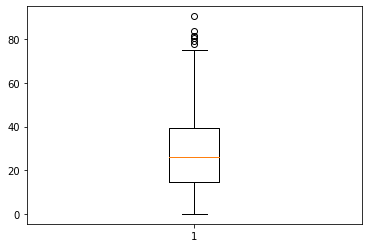

In [ ]:
plt.boxplot(int_df["distance_km"])
plt.show()

In [ ]:
#Имеются незначительные выбросы свыше 80 км

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


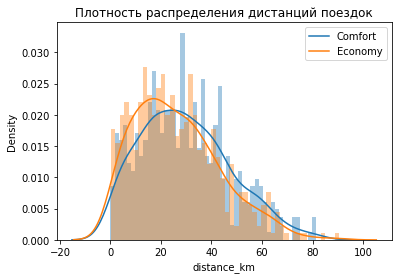

In [ ]:
sns.distplot(df_1['distance_km'],50)
sns.distplot(df_2['distance_km'],50)
plt.title('Плотность распределения дистанций поездок')
plt.legend(["Comfort",'Economy'])
plt.show()

In [ ]:
#Плотность распределения похожа на логнормальное  распределение


In [ ]:
from scipy.stats import mannwhitneyu
alpha = 0.05 #уровень значимости
result = mannwhitneyu(df_1['distance_km'],df_2['distance_km'])
print('p-value: %.8f' %result.pvalue)
if(result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


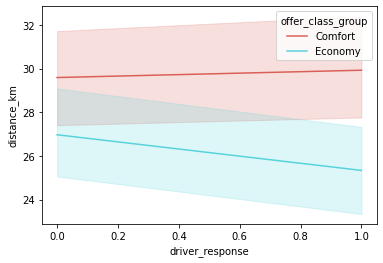

In [ ]:
sns.lineplot(
    x = "driver_response",
    y = "distance_km",
    hue = "offer_class_group",
    palette = "hls",
    data = int_df
)

In [ ]:
#Вывод: На дальние поездки пользователи предпочитают Comfort-класс классу Economy